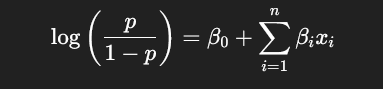

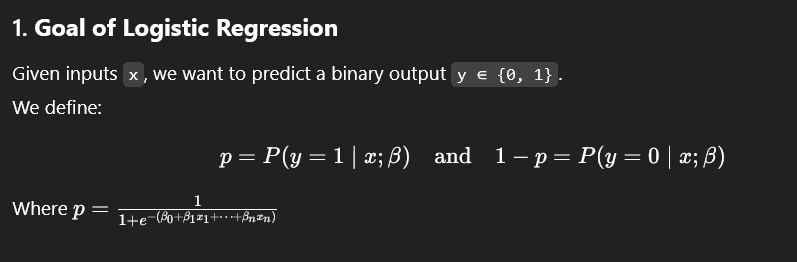

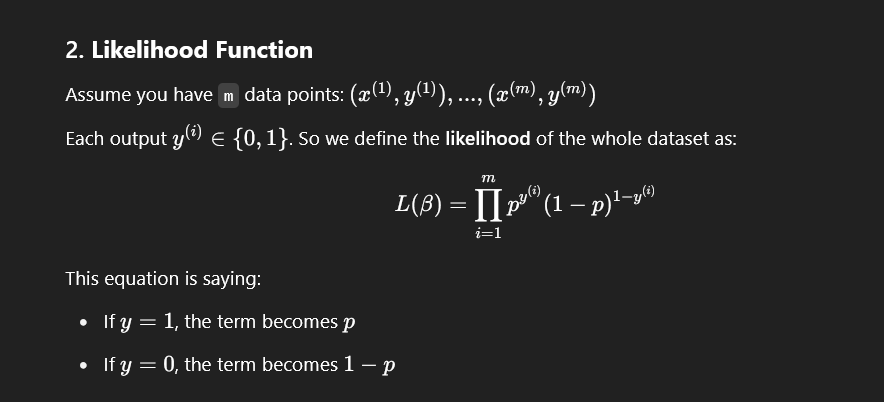

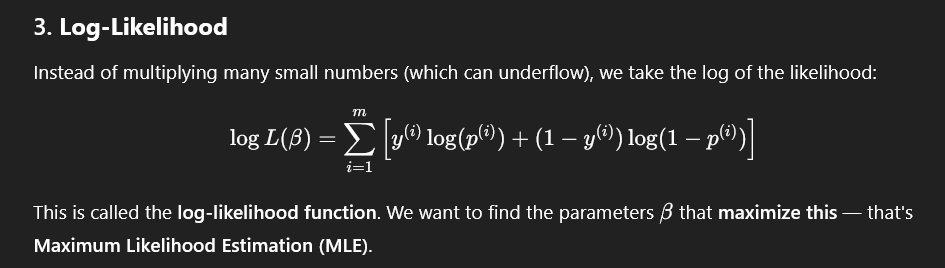

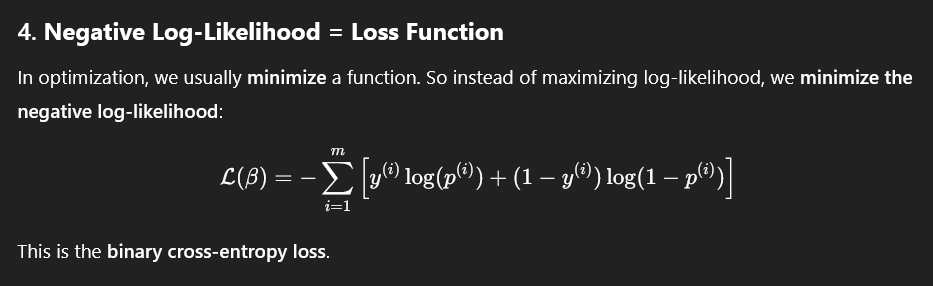

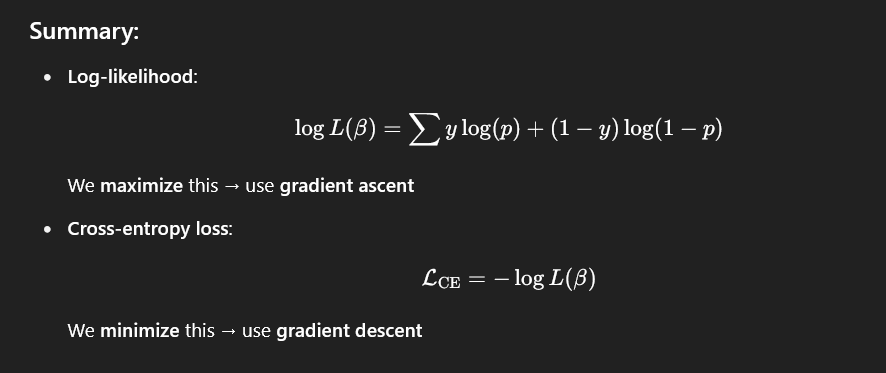

In [2]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = 16,8

import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv("../Admission_predict.csv")
df = df.drop(columns="Serial No.")
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


In [4]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
inp = df.drop(columns="Chance of Admit")
out = df['Chance of Admit']

In [6]:
df_sc = pd.DataFrame(StandardScaler().fit_transform(inp), columns=inp.columns)
df_sc

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.762107,1.746971,0.798829,1.093864,1.167321,1.764818,0.909112
1,0.627656,-0.067635,0.798829,0.596653,1.167321,0.455151,0.909112
2,-0.070467,-0.562528,-0.076600,-0.397769,0.052933,-1.005631,0.909112
3,0.453126,0.427257,-0.076600,0.099442,-1.061454,0.119339,0.909112
4,-0.244998,-0.727492,-0.952029,-1.392191,-0.504260,-0.653029,-1.099975
...,...,...,...,...,...,...,...
395,0.627656,0.427257,-0.076600,0.099442,0.052933,0.740592,0.909112
396,0.714922,-0.067635,-0.076600,-0.397769,0.052933,0.858126,0.909112
397,1.151249,1.417042,0.798829,1.591075,1.167321,1.429006,0.909112
398,-0.419528,-0.727492,-0.076600,0.099442,0.610127,0.304036,-1.099975


In [7]:
xtrain, xtest, ytrain, ytest = train_test_split(df_sc, out, test_size=0.3, random_state=29, stratify=out)

In [8]:
logit = sm.Logit(ytrain, sm.add_constant(xtrain)).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: 0.252522
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Chance of Admit   No. Observations:                  280
Model:                          Logit   Df Residuals:                      272
Method:                           MLE   Df Model:                            7
Date:                Thu, 01 May 2025   Pseudo R-squ.:                  0.6330
Time:                        14:16:48   Log-Likelihood:                -70.706
converged:                       True   LL-Null:                       -192.68
Covariance Type:            nonrobust   LLR p-value:                 5.382e-49
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.3741      0.219     -1.712      0.087      -0.802       0.054
GRE Score             0.5008      0.466      1.074      0.283      -0.413       1.415
TOEFL Score           0.5970      0.417      1.430      0.153      -0.221       1.415
University Rating     0.2577      0.373      0.690      0.490      -0.474       0.989
SOP                  -0.0851      0.398     -0.214      0.830      -0.865       0.694
LOR                   0.5490      0.340      1.613      0.107      -0.118       1.216
CGPA                  2.3548      0.547      4.303      0.000       1.282       3.427
Research              0.4064      0.234      1.734      0.083      -0.053       0.866
=====================================================================================
"""

In [9]:
logit.predict(sm.add_constant(xtest))

20     0.019976
105    0.817784
247    0.117011
26     0.673673
65     0.815316
         ...   
377    0.000326
182    0.004707
85     0.315109
131    0.372142
365    0.964933
Length: 120, dtype: float64

In [10]:
logit.params/logit.bse

const               -1.711813
GRE Score            1.073923
TOEFL Score          1.430159
University Rating    0.690376
SOP                 -0.214105
LOR                  1.612545
CGPA                 4.303372
Research             1.734315
dtype: float64

In [11]:
logr = LogisticRegression()
logr.fit(xtrain, ytrain)

LogisticRegression()

In [12]:
logr.predict(xtest)

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [13]:
logr.predict_proba(xtest)

array([[9.66632125e-01, 3.33678749e-02],
       [2.03526103e-01, 7.96473897e-01],
       [8.86238749e-01, 1.13761251e-01],
       [3.15245284e-01, 6.84754716e-01],
       [2.07099044e-01, 7.92900956e-01],
       [9.99890247e-01, 1.09753478e-04],
       [1.22420453e-02, 9.87757955e-01],
       [3.25139303e-01, 6.74860697e-01],
       [6.06835463e-01, 3.93164537e-01],
       [8.18868397e-01, 1.81131603e-01],
       [4.87012080e-01, 5.12987920e-01],
       [9.91074741e-01, 8.92525856e-03],
       [9.17681511e-01, 8.23184889e-02],
       [2.88529008e-02, 9.71147099e-01],
       [9.04318073e-03, 9.90956819e-01],
       [9.98011849e-01, 1.98815099e-03],
       [1.91082072e-02, 9.80891793e-01],
       [1.46449055e-01, 8.53550945e-01],
       [9.69570887e-01, 3.04291132e-02],
       [9.19732516e-01, 8.02674840e-02],
       [7.76140256e-04, 9.99223860e-01],
       [4.35402917e-01, 5.64597083e-01],
       [2.72220767e-03, 9.97277792e-01],
       [1.54752271e-01, 8.45247729e-01],
       [3.255310

In [14]:
# Model Evaluation 

In [15]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score
from sklearn.metrics import precision_score, classification_report, roc_curve, roc_auc_score

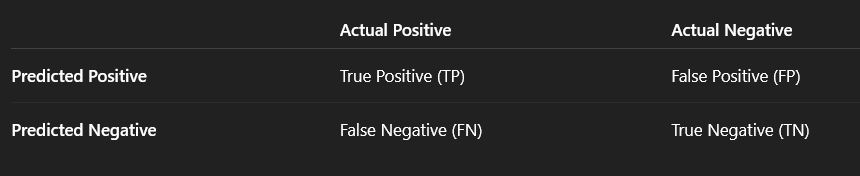

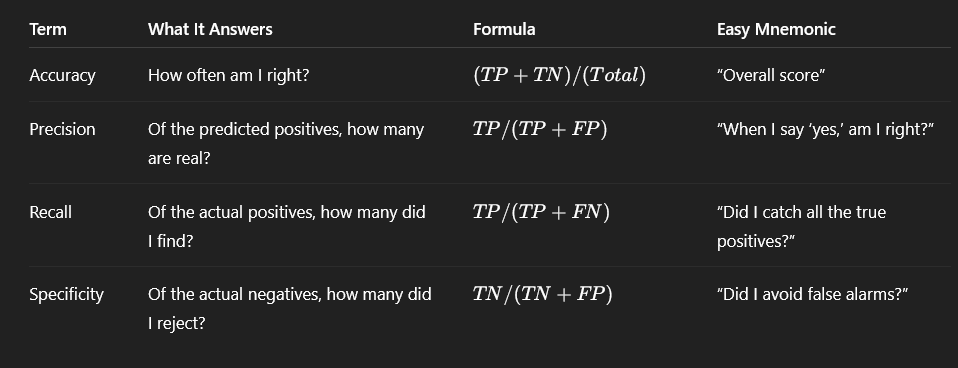

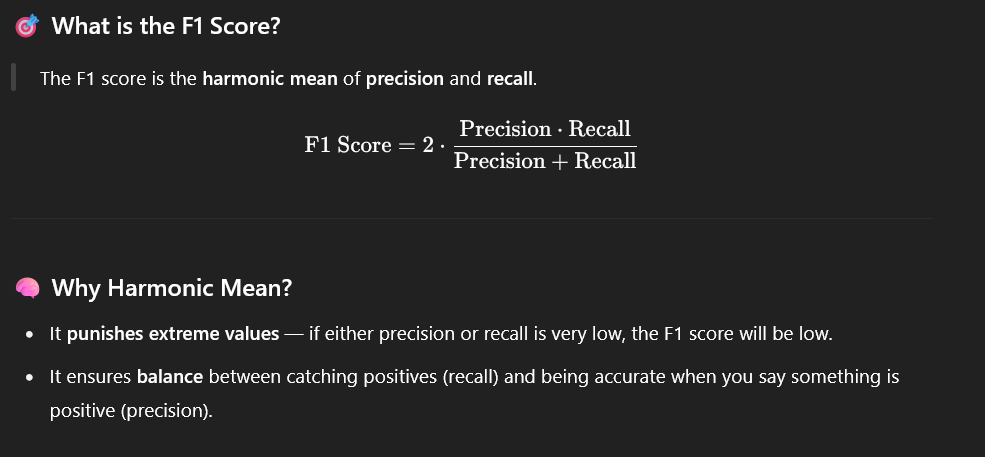

In [16]:
cm = confusion_matrix(y_true=ytest, y_pred=logr.predict(xtest))
cm

array([[58,  8],
       [ 6, 48]], dtype=int64)

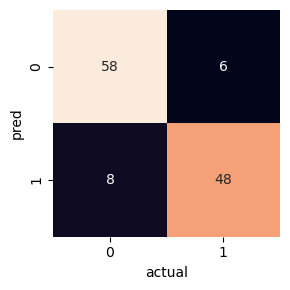

In [17]:

plt.subplots(1, 1, figsize=(3, 3))
sns.heatmap(cm.T, annot=True, cbar=False)
plt.xlabel("actual")
plt.ylabel("pred")
plt.tight_layout()
plt.show()

In [18]:
precision_score(y_true=ytest, y_pred=logr.predict(xtest))

0.8571428571428571

In [19]:
f1_score(y_true=ytest, y_pred=logr.predict(xtest))

0.8727272727272727

In [20]:
print(classification_report(y_true=ytest, y_pred=logr.predict(xtest)))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89        66
           1       0.86      0.89      0.87        54

    accuracy                           0.88       120
   macro avg       0.88      0.88      0.88       120
weighted avg       0.88      0.88      0.88       120



In [21]:
# ROC - AUC

In [22]:
roc_auc_score(ytest, logr.predict_proba(xtest)[:,1])

0.9551066217732884

In [29]:
fpr, tpr, th = roc_curve(ytest, logr.predict_proba(xtest)[:,1])

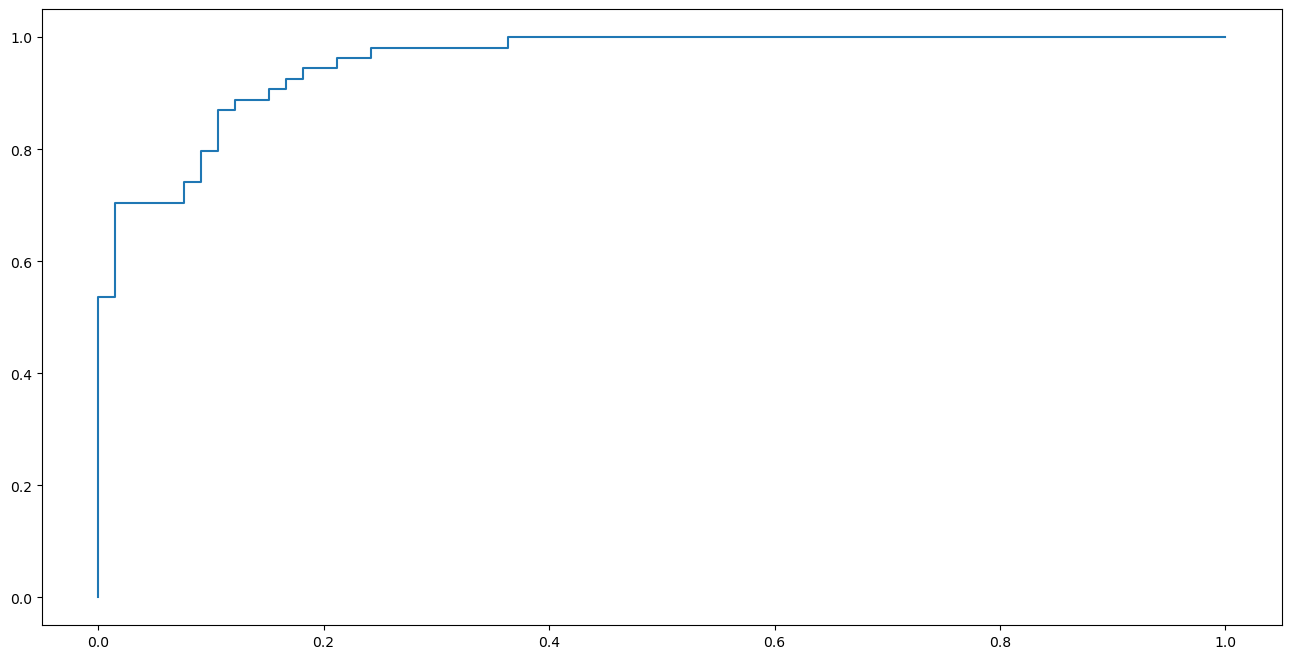

In [31]:
plt.plot(fpr, tpr)

In [25]:
# youden index method of chosing the threshold
# for which threshold the (TRP-FPR) is maximum

In [33]:
pd.DataFrame({"th": th, "tpr": tpr, "fpr": fpr, "tpr-fpr": tpr-fpr}).sort_values("tpr-fpr", ascending=False)

,th,tpr,fpr,tpr-fpr
12,0.512988,0.888889,0.121212,0.767677
10,0.564597,0.870370,0.106061,0.764310
18,0.382788,0.944444,0.181818,0.762626
16,0.393165,0.925926,0.166667,0.759259
14,0.441434,0.907407,0.151515,0.755892
20,0.342560,0.962963,0.212121,0.750842
11,0.528829,0.870370,0.121212,0.749158
17,0.392415,0.925926,0.181818,0.744108
15,0.403801,0.907407,0.166667,0.740741
22,0.290654,0.981481,0.242424,0.739057
